In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Télécharger les données historiques pour l'action Apple sur les 20 dernières années
data = yf.download('WMT', period='10y')

# Regrouper les données par semaine et prendre le dernier prix de clôture ajusté de la semaine
weekly_data = data.resample('W').last()

# Calculer le rendement hebdomadaire
weekly_data['Weekly_Return'] = weekly_data['Adj Close'].pct_change()

# Calculer la volatilité hebdomadaire (écart-type des rendements hebdomadaires)
weekly_data['Weekly_Volatility'] = weekly_data['Weekly_Return'].rolling(window=52).std() * np.sqrt(52)

# Supprimer les lignes avec des valeurs NaN résultant du calcul glissant
weekly_data.dropna(inplace=True)

# Créer un DataFrame pour stocker la volatilité hebdomadaire
volatility_df = weekly_data[['Weekly_Volatility']]

volatility_df.head

[*********************100%%**********************]  1 of 1 completed


<bound method NDFrame.head of             Weekly_Volatility
Date                         
2014-11-16           0.144503
2014-11-23           0.145613
2014-11-30           0.148604
2014-12-07           0.152603
2014-12-14           0.150582
...                       ...
2023-10-22           0.153900
2023-10-29           0.149376
2023-11-05           0.149871
2023-11-12           0.149772
2023-11-19           0.140896

[471 rows x 1 columns]>

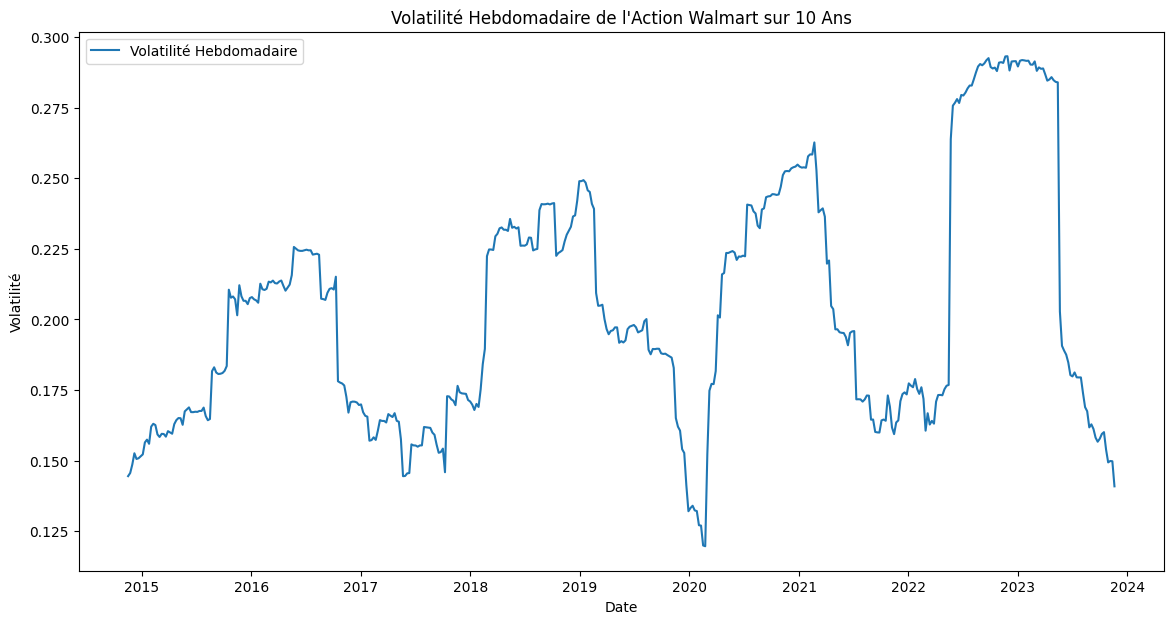

In [ ]:

plt.figure(figsize=(14, 7))  # Définir la taille du graphique
plt.plot(volatility_df.index, volatility_df['Weekly_Volatility'], label='Volatilité Hebdomadaire')
plt.title('Volatilité Hebdomadaire de l\'Action Walmart sur 10 Ans')  # Ajouter un titre
plt.xlabel('Date')  # Ajouter l'étiquette de l'axe des x
plt.ylabel('Volatilité')  # Ajouter l'étiquette de l'axe des y
plt.legend()  # Ajouter une légende
plt.show()  # Afficher le graphique
